***


# Emerging Technology Tasks


***
This Juypter Notebook is a collection of solutions to the tasks given to me for the Emerging Technology module delivered by Dr. Ian Mcloughlin. Each of the four tasks are marked below. You will also find a list of references with each task and also a general reference list that I used throughout.

Author: Darragh Lally   
GMIT ID: G00220290   
Mail: g00220290@gmit.ie
***

## Task 1: SQRT2  	$\sqrt{2}$

***

In the first of our tasks we are to create a python function that will compute and display the square root of 2, to 100 decimal places **without** using any extra imports, including but not limited to math.   


Using Newton's Method we can calculate the square root of a number [1.1]. To find the square root $z$ of number $x$, we can loop using the following;   
    
$$ z_{next} = z - \frac{z^2 - x}{2z} $$    


***
#### Step 1
***
Using Newtons method to calculate the square root of 2. Testing our algorithm with number '2' against the import 'math', we can confirm the algorithm is returning an acceptable value. But we are seeing a limited number of decimal places. The problem calls for us to print the value to one hundred decimal places. Which leads us to the next step.

#### Newtons Method in Python

In [1]:
def sqrt2(x):
    """
    A function to calculate the square root of a number. 
    """
    # Inital guess for sqrt of z
    z = x / 2     
    # Loop until happy with accuracy
    while abs(x - (z * z)) > 0.0001:
        # Calculate a better guess
        z -= (z*z - x) / (2*z)
    # Return the approx square root of x
    return z

# Test our function
print('Newtons Algorithm Result on 2:')
print(sqrt2(2))

# Test with the 'math' equivalent
import math
print('Python Library Result on 2:')
print(math.sqrt(2))

Newtons Algorithm Result on 2:
1.4142156862745099
Python Library Result on 2:
1.4142135623730951


***
#### Step 2
***
**2.1** We need to now figure out how to print out more decimal places, currently we have 15. One post on stackoverflow[1.2] suggests using the function repr() [1.3].
- repr(); This function returns a string representation of an object been passed as the parameter.
- Below test shows that repr() is returning the same number of decimal places as before.

In [2]:
# Testing repr()
ans = sqrt2(2)
print('With repr(): ')
print( repr(ans))
print('Without repr(): ')
print(ans)

With repr(): 
1.4142156862745099
Without repr(): 
1.4142156862745099


**2.2** The same stackoverflow post [1.2], also suggests trying to format the string output using the following;
- "{0:.100f}".format(a), where the float value is the number of decimal places.
    - We are getting closer to our solution as seen by the extra accuracy of our output, yet the trailing zeros should be addressed.
    
#### Testing

In [3]:
# Testing string formatting
ans = sqrt2(2)
"{0:.100f}".format(ans)

'1.4142156862745098866440685014822520315647125244140625000000000000000000000000000000000000000000000000'

**2.3** I found a response to the question 'Generating digits of square root 2' on Stackoverflow [1.4]. 
Function returns the square root of 'a' with 'digits' number of places.It does not however place the decimal point in its output. It takes two inputs 
1. Number to perform task on - 'a'
2. The number of places to print to - 'digits'
3. Performs the following algorithm on 'a' to increase its size dramatically.
$$ a * 10^{(2*digits)} $$
4. Finds the square root of new number

In [4]:
# https://stackoverflow.com/questions/5187664/generating-digits-of-square-root-of-2
def sqroot(a, digits):
    a = a * (10**(2*digits))
    x_prev = 0
    x_next = 1 * (10**digits)
    while x_prev != x_next:
        x_prev = x_next
        x_next = (x_prev + (a // x_prev)) >> 1
    return x_next
print('Stackoverflow Result:',sqroot(2,100))

Stackoverflow Result: 14142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


**2.4** Refactoring the above function to meet my needs. This will prove my understanding of the function but also allow me to add the decimal point into the output. Although the problem calls for us to deal with 2 to 100 places, I am leaving the function parameters, so we can perform this square root on any number passed in and, be able to decide the number of digits returned in each case.

In [5]:
# 2.0 Find square root of n to d decimal places
def sqrt2(n,d):
    # n = number to perform square root on
    # d = number of digits to return
    # 1. Multiply n by 10^(2*d)
    # 2. Get integer square root of new n
    # 3. Convert to string and store in list
    # 4. Add decimal point
    n = n*(10**(2*d))
    x_previous = 0
    x_next = 1*(10**d)
    while x_previous != x_next:
        x_previous = x_next
        x_next = (x_previous + (n//x_previous)) >> 1
    # Convert 'x_next' to a string, add to list
    l_chars = list(str(x_next))
    # Add decmial point in index 1 of list
    l_chars.insert(1,'.')
    # Concat l_chars
    ans = ''.join(l_chars)
    # return our answer
    return ans

# Testing 
print('The square root of 2, to 100 place:',sqrt2(2,100))

The square root of 2, to 100 place: 1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


### References; sqrt2
[1.1] A tour of Go; Exercise: Loops and Functions; https://tour.golang.org/flowcontrol/8

[1.2] stackeoverflow, more decimal places needed in python; https://stackoverflow.com/questions/14057835/more-decimal-places-needed-in-python

[1.3] repr(), Programiz, Python Tutorials; https://www.programiz.com/python-programming/methods/built-in/repr

[1.4] casevh, stackeoverflow contributor, Generating digits of square root of 2; https://stackoverflow.com/questions/5187664/generating-digits-of-square-root-of-2

***
## Task 2: Chi-squared  $\chi^2$
***
Our second task is to verify the Chi-squared value from a given table of data. Published by Karl Pearson in 1900, it is considerd to be a 'founding stone' of modern statistics[2.1].

#### Given Table - [2.1]
| | A | B | C | D | Total     
| :------------- | :----------: | :-----------: | :-----------: | :-----------: | -----------: |
|  White Collar | 90 | 60 | 104 | 95 | 349 |
| Blue Collar | 30 | 50 | 51 | 20 | 151 |
| No Collar | 30 | 40 | 45 | 35 | 150 |
| Total | 150 | 150 | 200 | 150 | 650 |


#### Value to be verified
Approximately **24.6**

A search for 'scipy.stats' and 'chi squared' gave me links to the SciPy.org website. It holds the documentation for chisquared [2.2]. Below I implement the function, using data from given table. By testing this function I have found that it is not returning the relevent information to me. I have tried with multiple parameter differences.
1. Table Data only
2. Table Data and expected frequencies
3. Table Data and delta degree of freedom

In [6]:
from scipy.stats import chisquare
import numpy as np

# 1. params: table data.
#chisquare([[90,60,104,95],[30,50,51,20],[30,40,45,35]])

# 2. params: table data, f_exp (expected frequencies in each cat)
#chisquare([[90,60,104,95],[30,50,51,20],[30,40,45,35]], f_exp=[[90,60,104,95],[30,50,51,20],[30,40,45,35]])

# 3. params: table data, ddof (delta degrees of freedom)
#chisquare([[90,60,104,95],[30,50,51,20],[30,40,45,35]], ddof=0.5)



Further research led me to chi2_contingency on scipy docs [2.3]. If we pass in our table data it will return;
1. Chi test statistic. 
2. 'p' value.
3. Degrees of freedom.
4. Expected frequencies array.

By using the below code we can confirm;
1. Approximated value 24.6 is only 0.03 off actual value.
2. 'p' value = 0.0004098425861096696 

In [7]:
from scipy.stats import chi2_contingency
import numpy as np

# Create numpy array from table data
obs = np.array([[90,60,104,95],[30,50,51,20],[30,40,45,35]])
# Pass into function
chi2_contingency(obs)

(24.5712028585826,
 0.0004098425861096696,
 6,
 array([[ 80.53846154,  80.53846154, 107.38461538,  80.53846154],
        [ 34.84615385,  34.84615385,  46.46153846,  34.84615385],
        [ 34.61538462,  34.61538462,  46.15384615,  34.61538462]]))

### References; chi squared
[2.1] Chi-squared, wikipedia, https://en.wikipedia.org/wiki/Chi-squared_test

[2.2] SciPy.org, scipy.stats.chi2_contingency; https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

[2.3] SciPy.org, scipy.stats.chisquare; https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

Abhik Mukherjee, Medium, Difference Between 'chi2_contingency' and 'chisquare' in scipy; https://mabhik93.medium.com/difference-between-chi2-contingency-and-chisquare-in-python-132dacf84678

Stack Exchange, Chi-squared test with scipy: whats the difference between chi2_contingency and chisquare; https://stats.stackexchange.com/questions/110718/chi-squared-test-with-scipy-whats-the-difference-between-chi2-contingency-and


***

## Task 3: MS Excel Standard Deviation, Population & Sample

***

Task 3 envolves standard deviation and in particular, the differences between Microsoft Excel's two implementations of the equation and demo why STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample.

1. **STDEV.P**
    * Standard deviation of an **entire population** 

    * Biased Analysis
    
    $$\sqrt{\frac{\epsilon(x - \bar{x})^2}{n}}$$
    
2. **STDEV.S**
    * Standard deviation of a **sample of an entire Population** 

    * Non-biased Analysis
    
    $$\sqrt{\frac{\epsilon(x - \bar{x})^2}{n-1}}$$



In [8]:
import numpy as np

# STDEV.P
def stdev_p(x):
    return np.sqrt(np.sum((x - np.mean(x))**2)/len(x))

# STDEV.S
def stdev_s(x):
    return np.sqrt(np.sum((x - np.mean(x))**2)/(len(x)-1))

# To find the % difference
def percent_diff(x,y):
    return (x-y)/((x+y)/2)

# Test arrays 1
t1_pop = [50,35,100,60,5,9]
t1_samp = [50,35,100]
# Test arrays 2
t2_pop = [10,1,3,4,20,34,75,14,22]
t2_samp = [10,1,3,4,20,34]
# Test arrays 3
t3_pop = [125,50,230,10,100]
t3_samp = [125,50,230]
# Test arrays 4
t4_pop = [1,10,15,37,84,25,1500,783,9450,6783,1011,2159]
t4_samp = [783,9450,6783,1011,2159]

# Test arrays 5.1
t5_1_pop = [158,149,12,62,99,100,23,745,302,71,3,662,369,1053,8,796,518]
t5_1_samp = [158,149,12,62]
# Test arrays 5.2
t5_2_pop = [158,149,12,62,99,100,23,745,302,71,3,662,369,1053,8,796,518]
t5_2_samp = [158,149,12,62,99,100,23,745,302]

entire_pop = t5_1_pop
sample_pop = t5_1_samp

# Testing
# Print Population Data
print('Entire Population:', entire_pop)
print('Sample Population:', sample_pop)
print('\nFormulas used as intended:')

# SD Population with entire population
print('STDEV.P with entire pop:', stdev_p(entire_pop))
# SD Sample with sample population
print('STDEV.S with sample pop:', stdev_s(sample_pop))
# Find percentage difference
x1 = stdev_p(entire_pop) 
y1 = stdev_s(sample_pop)
dif = percent_diff(x1,y1)
print('Difference {:.4%}'.format(abs(dif)))

print('\nIncorrect use of STDEV.S formula:')
# SD Sample with entire population
print('STDEV.S with entire pop:', stdev_s(entire_pop))
y2 = stdev_s(entire_pop)
dif1 = percent_diff(x1, y2)
print('Difference {:.4%}'.format(abs(dif1)))

print('\nIncorrect use of STDEV.P formula:')
# SD Population with sample population
print('STDEV.P with sample pop:', stdev_p(sample_pop))
y3 = stdev_p(sample_pop)
dif2 = percent_diff(x1,y3)
print('Difference {:.4%}'.format(abs(dif2)))

Entire Population: [158, 149, 12, 62, 99, 100, 23, 745, 302, 71, 3, 662, 369, 1053, 8, 796, 518]
Sample Population: [158, 149, 12, 62]

Formulas used as intended:
STDEV.P with entire pop: 321.75319906298745
STDEV.S with sample pop: 70.38643335188962
Difference 128.2027%

Incorrect use of STDEV.S formula:
STDEV.S with entire pop: 331.65560627927067
Difference 3.0310%

Incorrect use of STDEV.P formula:
STDEV.P with sample pop: 60.95643936451669
Difference 136.2896%


I have four sets of test data in the block above. Running each group of data through the code is throwing up some interesting information:

**Test 1**<br>
5.3% difference between STDEV.P(**Enitre** Population) and STDEV.S(**Sample** Population)<br>
9.1% difference between STDEV.P(**Enitre** Population) and STDEV.S(**Enitre** Population)<br>
14.9% difference between STDEV.P(**Enitre** Population) and STDEV.P(**Sample** Population)<br>

**Test 2**<br>
51.96% difference between STDEV.P(**Enitre** Population) and STDEV.S(**Sample** Population)<br>
5.8% difference between STDEV.P(**Enitre** Population) and STDEV.S(**Enitre** Population)<br>
60.36% difference between STDEV.P(**Enitre** Population) and STDEV.P(**Sample** Population)<br>

**Test 3**<br>
18.7% difference between STDEV.P(**Enitre** Population) and STDEV.S(**Sample** Population)<br>
11.14% difference between STDEV.P(**Enitre** Population) and STDEV.S(**Enitre** Population)<br>
1.5% difference between STDEV.P(**Enitre** Population) and STDEV.P(**Sample** Population)<br>

**Test 4**<br>
27.35% difference between STDEV.P(**Enitre** Population) and STDEV.S(**Sample** Population)<br>
4.34% difference between STDEV.P(**Enitre** Population) and STDEV.S(**Enitre** Population)<br>
16.3% difference between STDEV.P(**Enitre** Population) and STDEV.P(**Sample** Population)<br>

It would seem as though, depending on the sample sizes our calculation fluctuates greatly. I have done some research on this and what I have found seems to back up my theory[3.1],[3.2],[3.3],[3.4],[3.5]. I prove this using Tests 5.1 and 5.2:

**Test 5.1** using 4 values from the entire population as the sample size<br>
128.2% difference between STDEV.P(**Enitre** Population) and STDEV.S(**Sample** Population)<br>
3.0% difference between STDEV.P(**Enitre** Population) and STDEV.S(**Enitre** Population)<br>
136.28% difference between STDEV.P(**Enitre** Population) and STDEV.P(**Sample** Population)<br>

**Test 5.2** using 9 values from the entire population as the sample size<br>
34.18% difference between STDEV.P(**Enitre** Population) and STDEV.S(**Sample** Population)<br>
3.0% difference between STDEV.P(**Enitre** Population) and STDEV.S(**Enitre** Population)<br>
39.87% difference between STDEV.P(**Enitre** Population) and STDEV.P(**Sample** Population)<br>

These tests also show that using STDEV.S with the entire population is usually more accurate than using the same formula with the sample size. This makes sense as we are feeding more data into the formula and therefor will be more acurate. Of all the tests above, only Test 1 shows that using STDEV.S with a sample size is more accurate than my previous comment.

### References; STDEV.S & STDEV.P

stdev.s https://support.microsoft.com/en-us/office/stdev-s-function-7d69cf97-0c1f-4acf-be27-f3e83904cc23

stdev.p https://support.microsoft.com/en-us/office/stdev-p-function-6e917c05-31a0-496f-ade7-4f4e7462f285

Standard Deviation and Python https://blog.finxter.com/how-to-get-the-standard-deviation-of-a-python-list/

Formatting https://mkaz.blog/code/python-string-format-cookbook/

[3.1] https://www.dummies.com/education/math/statistics/how-to-determine-the-minimum-size-needed-for-a-statistical-sample/

[3.2] https://en.wikipedia.org/wiki/Sample_size_determination

[3.3] https://brownmath.com/stat/sampsiz.htm

[3.4] https://www.itl.nist.gov/div898/handbook/prc/section2/prc222.htm

[3.5] https://demonstrations.wolfram.com/DistributionOfNormalMeansWithDifferentSampleSizes/

***

## Task 4: K-Means Clustering on Fisher's Irirs Data

***


Task 4, in this variation, involves applying K-Means Clustering on Fisher's Iris Data Set[4.1]. 

In [5]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
#import sklearn.cluster as skcl

In [6]:
# Dataset
#data = pd.read_csv("iris.csv")
iris = datasets.load_iris()

In [7]:
# Define target and predictor
X = iris.data[:, :2]
y = iris.target

Text(0, 0.5, 'Sepal Width')

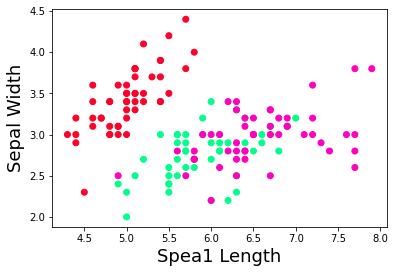

In [8]:
# Create Scatter Plot
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

In [9]:
# Fitting: Perform kmeans fitting, pass in dataset and perform kmeans
mykmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [10]:
# Get the cluster centers
centers = mykmeans.cluster_centers_
print(centers)

[[6.61044776 2.96567164]
 [5.22409639 3.1313253 ]]


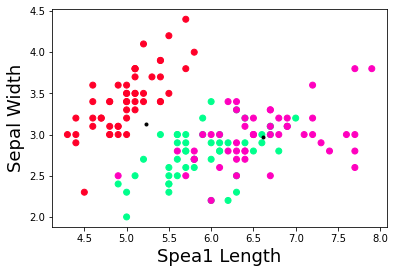

In [11]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)
plt.plot(centers[:,0], centers[:,1], 'k.')

### References

https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee

[4.1] Curren, GitHub, Fisher's Iris Dataset; https://gist.github.com/curran/a08a1080b88344b0c8a7

# References

### General
Markdown mathematical symbols, LKS90 Github; https://gist.github.com/LKS90/252ac41bd4a173be35b0 

Markdown Guide; https://www.markdownguide.org/

Numpy Documentation; https://numpy.org/doc/stable/user/quickstart.html



*** 

#### End